<a href="https://colab.research.google.com/github/ShriyaGarg10/CS253/blob/main/assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import files


uploaded = files.upload()


Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
#Importing csvs as dataframes
import pandas as pd
import io

test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))



        ID                   Candidate   Constituency ∇ Party  Criminal Case  \
0        0           Geeta Bharat Jain  MEERA BHAYANDAR   IND              2   
1        1              Becharam Manna           SINGUR  AITC              1   
2        2          Sunil Vijay Tingre    VADGAON SHERI   NCP              3   
3        3       Asit Mazumder (Tapan)        CHUNCHURA  AITC              1   
4        4  Hriday Narayan Singh Patel            SAGRI    SP              0   
...    ...                         ...              ...   ...            ...   
1369  1369         Niladri Sekhar Dana          BANKURA   BJP              0   
1370  1370            Mukesh Kumar Pal        PALLAHARA   BJD              1   
1371  1371         Vijay Shanker Dubey      MAHARAJGANJ   INC              1   
1372  1372          Satpal Singh Satti              UNA   BJP              1   
1373  1373          Dharam Lal Kaushik            BILHA   BJP              0   

     Total Assets Liabilities          

In [ ]:

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Convert 'Total Assets' and 'Liabilities' from string to numerical values
train['Total Assets'] = train['Total Assets'].str.replace(' Crore+', '0000000').str.replace(' Lac+', '00000').str.replace(' Thou+', '000').str.replace(' Hund+', '00').astype(float)
train['Liabilities'] = train['Liabilities'].str.replace(' Crore+', '0000000').str.replace(' Lac+', '00000').str.replace(' Thou+', '000').str.replace(' Hund+', '00').astype(float)
test['Total Assets'] = test['Total Assets'].str.replace(' Crore+', '0000000').str.replace(' Lac+', '00000').str.replace(' Thou+', '000').str.replace(' Hund+', '00').astype(float)
test['Liabilities'] = test['Liabilities'].str.replace(' Crore+', '0000000').str.replace(' Lac+', '00000').str.replace(' Thou+', '000').str.replace(' Hund+', '00').astype(float)


# Convert categorical variables into numerical ones
le = LabelEncoder()
categorical_features = ['Party', 'state']
for feature in categorical_features:
    train[feature] = le.fit_transform(train[feature])
    test[feature] = le.transform(test[feature])  # Use the same encoder to transform the test set

# Drop the 'Candidate' and 'Constituency ∇' features
X_train = train.drop(['Candidate', 'Constituency ∇', 'Education'], axis=1)
test = test.drop(['Candidate', 'Constituency ∇'], axis=1)

y_train = train['Education']
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(test)
#create CSV file
output = pd.DataFrame({'ID': test['ID'], 'Education': y_pred})
output.to_csv('output.csv', index=False)


In [ ]:
#download the CSV

files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

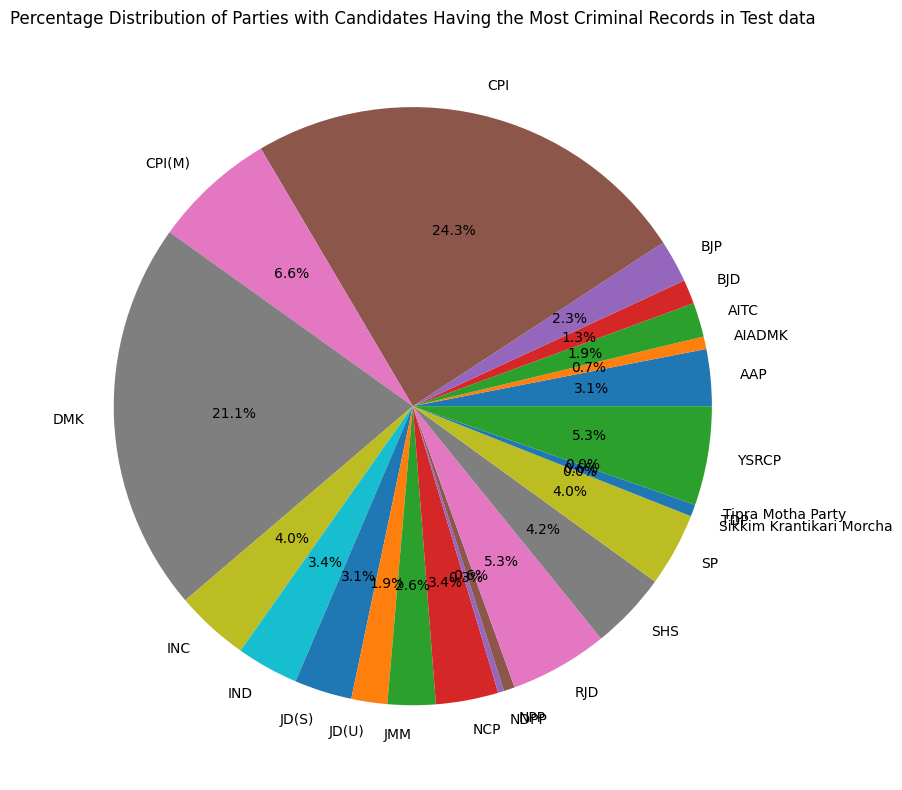

In [ ]:
#Plotting graphs

import matplotlib.pyplot as plt


train_original = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test_original = pd.read_csv(io.BytesIO(uploaded['test.csv']))



# Calculate total criminal cases per party
party_criminal_cases = train_original.groupby('Party')['Criminal Case'].sum()
party_criminal_cases_test = test_original.groupby('Party')['Criminal Case'].sum()

# Calculate percentage distribution of parties with candidates having the most criminal records
criminal_records_distribution = party_criminal_cases / train_original['Party'].value_counts()
criminal_records_distribution_test = party_criminal_cases_test / test_original['Party'].value_counts()



plt.figure(figsize=(10, 8))
plt.pie(criminal_records_distribution_test, labels=criminal_records_distribution_test.index, autopct='%1.1f%%')
plt.title("Percentage Distribution of Parties with Candidates Having the Most Criminal Records in Test data")
plt.tight_layout()
plt.savefig("criminal_records_pie_chart_test.png")
files.download('criminal_records_pie_chart_test.png')
plt.show()


In [ ]:

train_original['Total Assets'] = train_original['Total Assets'].str.replace(' Crore+', '0000000').str.replace(' Lac+', '00000').str.replace(' Thou+', '000').str.replace(' Hund+', '00').astype(float)
train_original['Liabilities'] = train_original['Liabilities'].str.replace(' Crore+', '0000000').str.replace(' Lac+', '00000').str.replace(' Thou+', '000').str.replace(' Hund+', '00').astype(float)
test_original['Total Assets'] = test_original['Total Assets'].str.replace(' Crore+', '0000000').str.replace(' Lac+', '00000').str.replace(' Thou+', '000').str.replace(' Hund+', '00').astype(float)
test_original['Liabilities'] = test_original['Liabilities'].str.replace(' Crore+', '0000000').str.replace(' Lac+', '00000').str.replace(' Thou+', '000').str.replace(' Hund+', '00').astype(float)

party_wealth = (train_original.groupby('Party')['Total Assets'].sum() - train_original.groupby('Party')['Liabilities'].sum()) / train_original['Party'].value_counts()
party_wealth_test = (test_original.groupby('Party')['Total Assets'].sum() - test_original.groupby('Party')['Liabilities'].sum()) / test_original['Party'].value_counts()



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

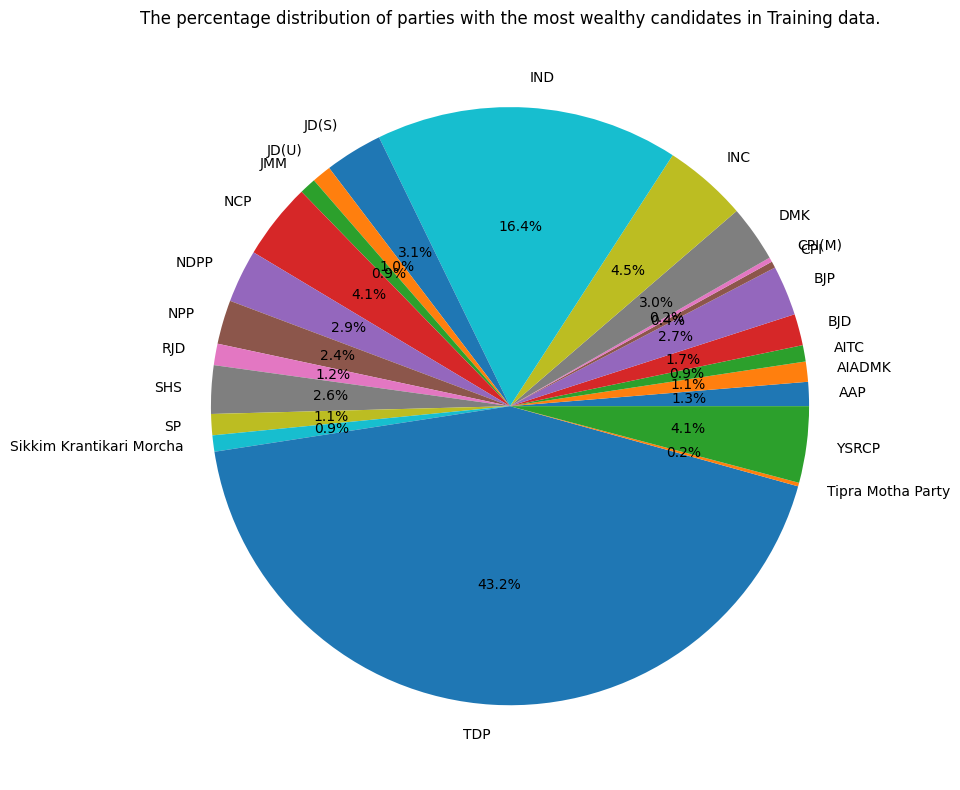

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

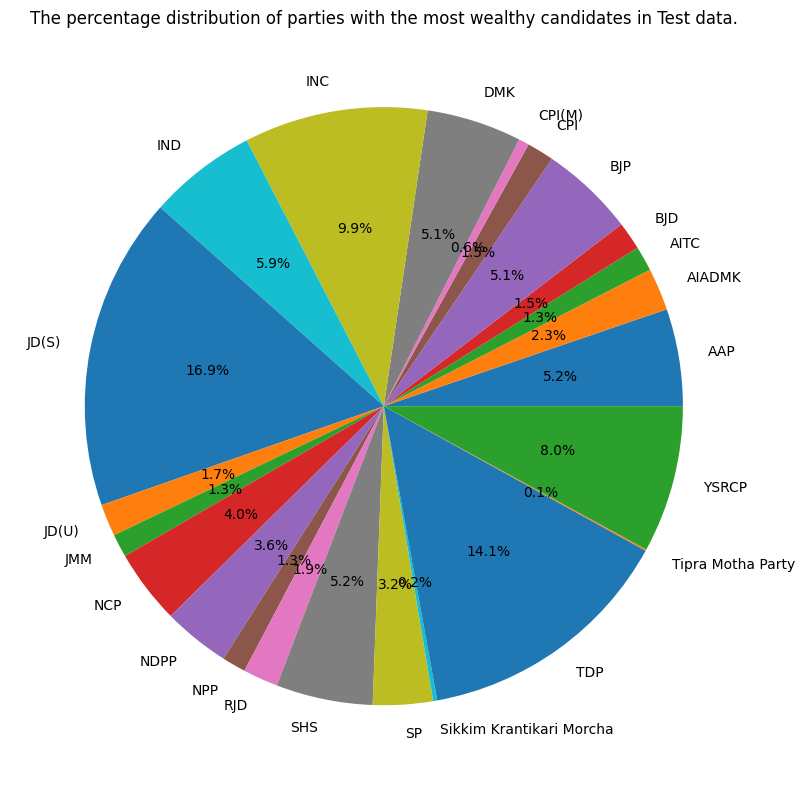

In [ ]:
#Percentage wealth plots for training and test datas

plt.figure(figsize=(10, 8))
plt.pie(party_wealth, labels=party_wealth.index, autopct='%1.1f%%')
plt.title("The percentage distribution of parties with the most wealthy candidates in Training data.")
plt.tight_layout()
plt.savefig("wealth_pie_chart.png")
files.download('wealth_pie_chart.png')
plt.show()

plt.figure(figsize=(10, 8))
plt.pie(party_wealth_test, labels=party_wealth_test.index, autopct='%1.1f%%')
plt.title("The percentage distribution of parties with the most wealthy candidates in Test data.")
plt.tight_layout()
plt.savefig("wealth_pie_chart_test.png")
files.download('wealth_pie_chart_test.png')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

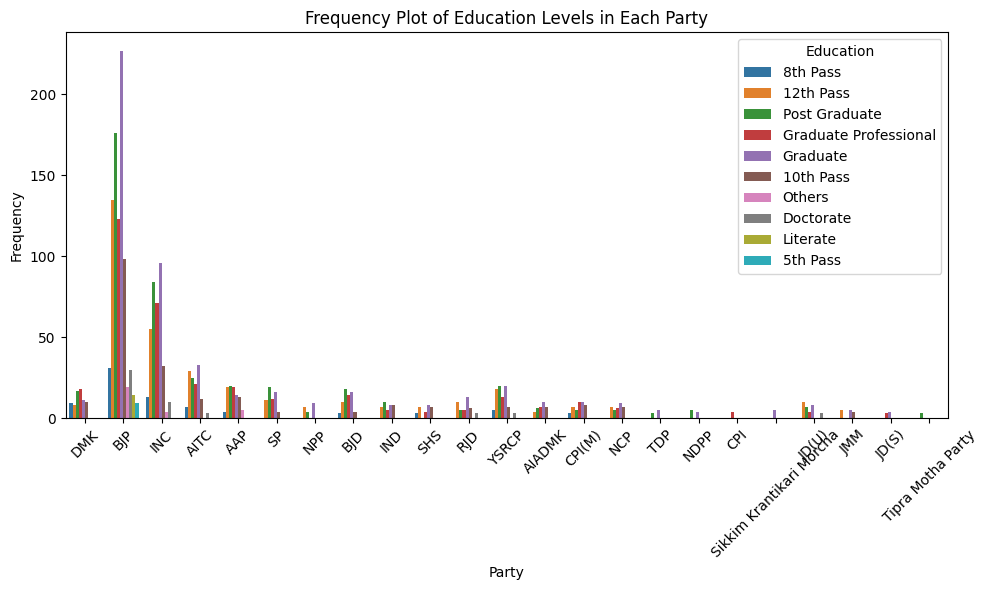

In [ ]:
#Education levels in each party

import seaborn as sns

education_order = train_original['Education'].unique()

# Plot grouped bar plot for education levels in each party
plt.figure(figsize=(10, 6))
sns.countplot(data=train_original, x='Party', hue='Education', order=train_original['Party'].unique(), hue_order=education_order)
plt.title("Frequency Plot of Education Levels in Each Party")
plt.xlabel("Party")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.legend(title="Education")
plt.tight_layout()
plt.savefig("education_frequency_plot.png")
files.download('education_frequency_plot.png')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

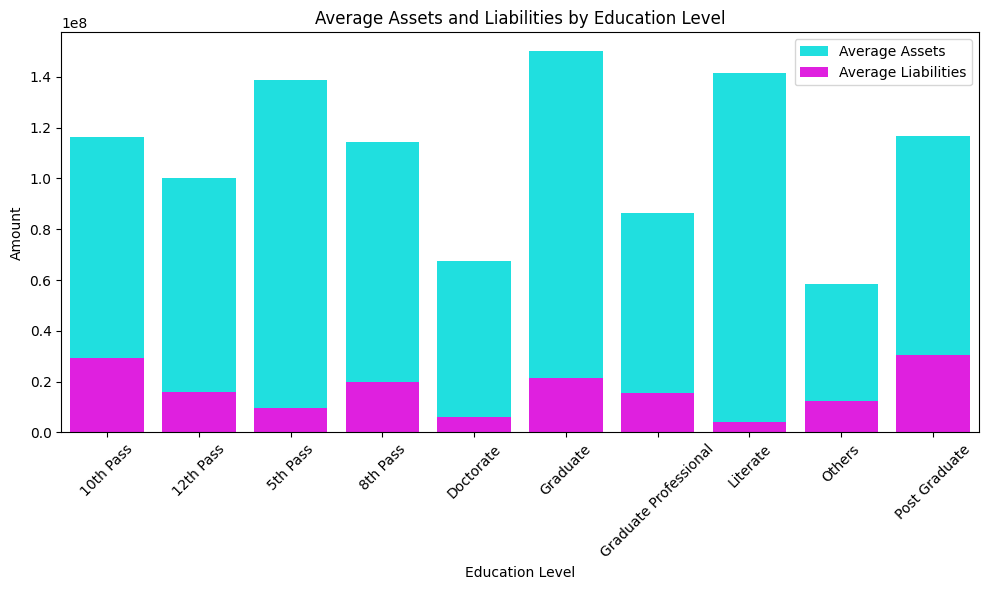

In [ ]:
#Avg Assets and Liabilities by Education Levels
education_stats = train_original.groupby('Education').agg({'Total Assets': 'mean', 'Liabilities': 'mean'}).reset_index()

# Plot grouped bar graph with educational levels on x-axis and average assets and liabilities as bars
plt.figure(figsize=(10, 6))
sns.barplot(data=education_stats, x='Education', y='Total Assets', color='cyan', label='Average Assets')
sns.barplot(data=education_stats, x='Education', y='Liabilities', color='magenta', label='Average Liabilities')
plt.title("Average Assets and Liabilities by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Amount")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("assets_liabilities_bar_graph.png")
files.download('assets_liabilities_bar_graph.png')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

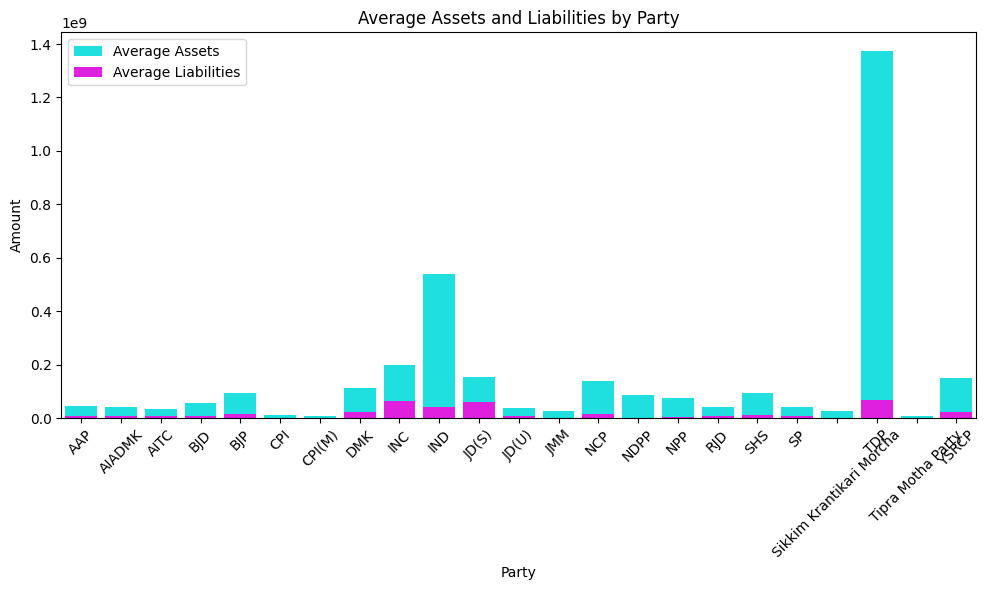

In [ ]:
#Average Assets and Liabilities by Party

party_stats = train_original.groupby('Party').agg({'Total Assets': 'mean', 'Liabilities': 'mean'}).reset_index()

# Plot grouped bar graph with educational levels on x-axis and average assets and liabilities as bars
plt.figure(figsize=(10, 6))
sns.barplot(data=party_stats, x='Party', y='Total Assets', color='cyan', label='Average Assets')
sns.barplot(data=party_stats, x='Party', y='Liabilities', color='magenta', label='Average Liabilities')
plt.title("Average Assets and Liabilities by Party")
plt.xlabel("Party")
plt.ylabel("Amount")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("assets_liabilities_per_party.png")
files.download('assets_liabilities_per_party.png')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

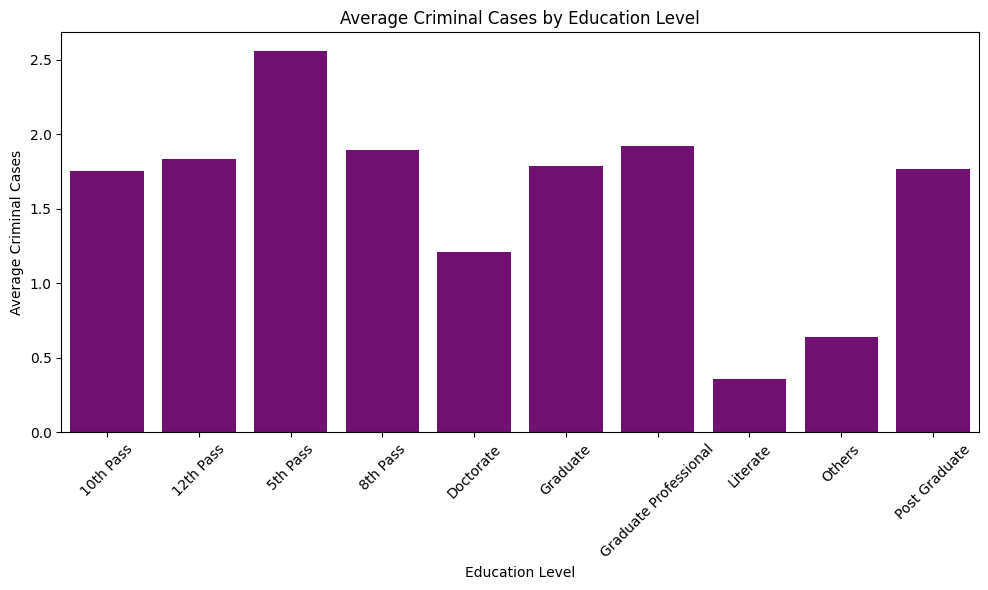

In [ ]:
#Average Criminal Cases by Education Level

criminal_cases_avg = train_original.groupby('Education')['Criminal Case'].mean().reset_index()

# Plot bar graph for average number of criminal cases vs educational level
plt.figure(figsize=(10, 6))
sns.barplot(data=criminal_cases_avg, x='Education', y='Criminal Case',color='purple')
plt.title("Average Criminal Cases by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Average Criminal Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("criminal_cases_education_bar_plot.png")
files.download('criminal_cases_education_bar_plot.png')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

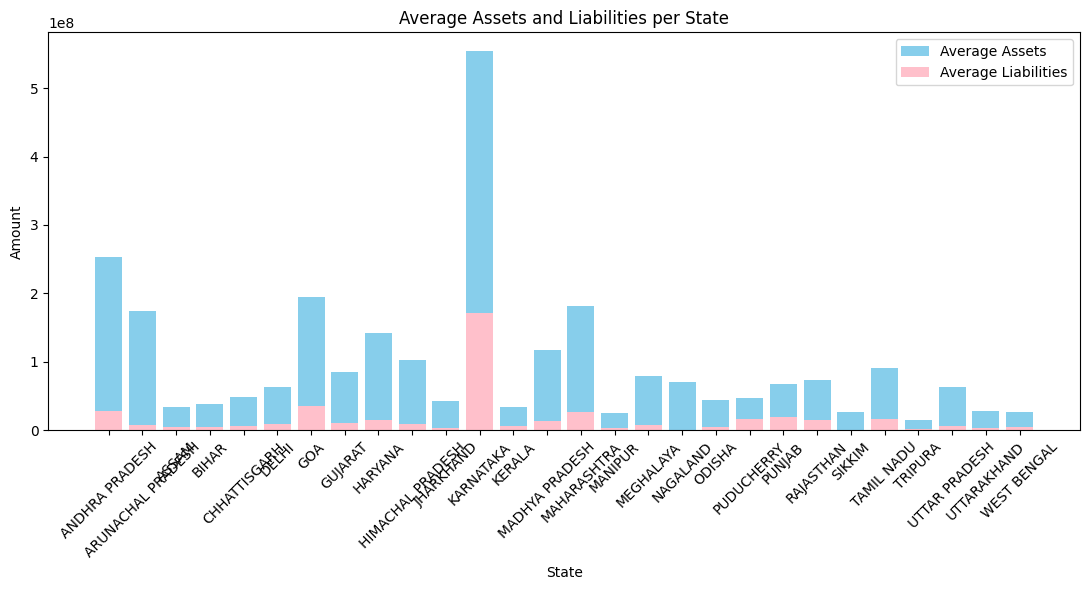

In [ ]:
#Average Assets and Liabilities per State

state_stats = train_original.groupby('state').agg({'Total Assets': 'mean', 'Liabilities': 'mean'}).reset_index()

# Plot bar graph for average assets and liabilities per state
plt.figure(figsize=(11, 6))
plt.bar(state_stats['state'], state_stats['Total Assets'], color='skyblue', label='Average Assets')
plt.bar(state_stats['state'], state_stats['Liabilities'], color='pink', label='Average Liabilities')
plt.title("Average Assets and Liabilities per State")
plt.xlabel("State")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig("asset_liab_state.png")
files.download('asset_liab_state.png')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 10000x6000 with 0 Axes>

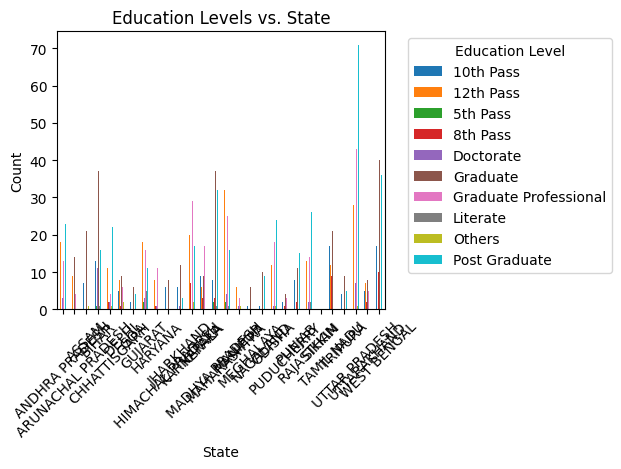

In [ ]:
#Education Levels vs. State

education_distribution = train_original.groupby(['state', 'Education']).size().unstack(fill_value=0)

# Plot grouped bar graph for education levels vs. state
plt.figure(figsize=(100, 60))
education_distribution.plot(kind='bar', stacked=False)
plt.title("Education Levels vs. State")
plt.xlabel("State")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Education Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("edu_state.png")
files.download('edu_state.png')
plt.show()